# End-To-End Covid Stay Project

In this project we would have to predict the time span of the patient who is suffering from covid based on certain parameters like:

* Hospital_code
* Hospital_type_code
* city_code_hospital
* hospital_region_code
* Available_extra_rooms_in_hospital
* Department
* ward_type
* ward_facility_code
* Bed_Grade
* patient_id
..............etc


### Importing the data from GitHub

In [1]:
!wget https://raw.githubusercontent.com/Adwait01-Bhosale/RoboSpark/master/Covid_Stay_Data.csv

--2021-10-15 13:08:40--  https://raw.githubusercontent.com/Adwait01-Bhosale/RoboSpark/master/Covid_Stay_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26915586 (26M) [text/plain]
Saving to: ‘Covid_Stay_Data.csv’

Covid_Stay_Data.csv 100%[===================>]  25.67M   125MB/s    in 0.2s    

2021-10-15 13:08:41 (125 MB/s) - ‘Covid_Stay_Data.csv’ saved [26915586/26915586]



In [2]:
# Loading the data using pandas 
import pandas as pd
import random
data=pd.read_csv("Covid_Stay_Data.csv")

In [3]:
#  Taking only 8000 rows of dataset
data=data.sample(30000)

In [4]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
285735,285736,32,f,9,Y,2,radiotherapy,S,B,3.0,25194,7.0,Trauma,Minor,2,51-60,4366.0,11-20
302953,302954,32,f,9,Y,2,gynecology,S,B,4.0,36233,8.0,Trauma,Minor,4,41-50,6823.0,51-60
95795,95796,1,d,10,Y,2,gynecology,R,B,3.0,98211,7.0,Urgent,Moderate,2,31-40,5630.0,21-30
67963,67964,6,a,6,X,4,gynecology,Q,F,2.0,43902,8.0,Emergency,Extreme,4,41-50,3513.0,21-30
186867,186868,30,c,3,Z,4,gynecology,Q,A,2.0,64160,8.0,Emergency,Extreme,4,51-60,5248.0,51-60


In [5]:
# Renaming all the columns to avoid errors of column name 
data.rename(columns = {'Bed Grade' : 'Bed_Grade', 'Available Extra Rooms in Hospital' : 'Available_Extra_Rooms_in_Hospital','Type of Admission':'Type_of_Admission','Severity of Illness':'Severity_of_Illness','Visitors with Patient':'Visitors_with_Patient'},inplace=True)

## Dropping Few Unnecessary Columns

In [6]:
data.drop('case_id',axis=1,inplace=True)

In [7]:
data.drop('patientid',axis=1,inplace=True)

In [8]:
data['Hospital_code'].unique()

array([32,  1,  6, 30, 21, 12, 26, 19, 11, 14, 23, 10, 18,  3, 20, 29, 15,
       28,  5,  9, 27, 16, 13,  8, 24, 25, 31,  4, 22, 17,  2,  7])

In [9]:
data.drop('Hospital_code',axis=1,inplace=True)

In [10]:
data['City_Code_Hospital'].unique()

array([ 9, 10,  6,  3,  2,  7,  1, 13,  4,  5, 11])

In [11]:
data.drop('City_Code_Hospital',axis=1,inplace=True)

In [12]:
data['Visitors_with_Patient'].unique()

array([ 2,  4,  7,  3,  6,  5,  9,  8, 24, 10,  1, 12, 14, 11, 22, 16, 15,
       20, 25,  0, 13, 18, 30, 21])

In [13]:
data.drop('Visitors_with_Patient',axis=1,inplace=True)


In [14]:
data['Hospital_region_code'].unique()

array(['Y', 'X', 'Z'], dtype=object)

In [15]:
data.drop('Hospital_region_code',axis=1, inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 285735 to 204675
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hospital_type_code                 30000 non-null  object 
 1   Available_Extra_Rooms_in_Hospital  30000 non-null  int64  
 2   Department                         30000 non-null  object 
 3   Ward_Type                          30000 non-null  object 
 4   Ward_Facility_Code                 30000 non-null  object 
 5   Bed_Grade                          29986 non-null  float64
 6   City_Code_Patient                  29571 non-null  float64
 7   Type_of_Admission                  30000 non-null  object 
 8   Severity_of_Illness                30000 non-null  object 
 9   Age                                30000 non-null  object 
 10  Admission_Deposit                  30000 non-null  float64
 11  Stay                               30000 non-nul

### Counting the number of ranges of values present in the stay column

In [17]:
data['Stay'].value_counts()

21-30                 8260
11-20                 7290
31-40                 5165
51-60                 3253
0-10                  2252
41-50                 1135
71-80                  967
More than 100 Days     681
81-90                  461
61-70                  276
91-100                 260
Name: Stay, dtype: int64

In [18]:
data.head()

,Hospital_type_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Age,Admission_Deposit,Stay
285735,f,2,radiotherapy,S,B,3.0,7.0,Trauma,Minor,51-60,4366.0,11-20
302953,f,2,gynecology,S,B,4.0,8.0,Trauma,Minor,41-50,6823.0,51-60
95795,d,2,gynecology,R,B,3.0,7.0,Urgent,Moderate,31-40,5630.0,21-30
67963,a,4,gynecology,Q,F,2.0,8.0,Emergency,Extreme,41-50,3513.0,21-30
186867,c,4,gynecology,Q,A,2.0,8.0,Emergency,Extreme,51-60,5248.0,51-60


In [19]:
# Checking out the info of every column in the data, also get to know the datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 285735 to 204675
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hospital_type_code                 30000 non-null  object 
 1   Available_Extra_Rooms_in_Hospital  30000 non-null  int64  
 2   Department                         30000 non-null  object 
 3   Ward_Type                          30000 non-null  object 
 4   Ward_Facility_Code                 30000 non-null  object 
 5   Bed_Grade                          29986 non-null  float64
 6   City_Code_Patient                  29571 non-null  float64
 7   Type_of_Admission                  30000 non-null  object 
 8   Severity_of_Illness                30000 non-null  object 
 9   Age                                30000 non-null  object 
 10  Admission_Deposit                  30000 non-null  float64
 11  Stay                               30000 non-nul

In [20]:
# Checking the shape of our dataset
data.shape

(30000, 12)

In [21]:
# Here comes the step where we drop the unnecesary range of the column Stay
data=data[~data.Stay.str.contains("41-50")]
data=data[~data.Stay.str.contains("71-80")]
data=data[~data.Stay.str.contains("More than 100 Days")]
data=data[~data.Stay.str.contains("81-90")]
data=data[~data.Stay.str.contains("91-100")]
data=data[~data.Stay.str.contains("61-70")]

## `Nan` Values

In [22]:
# Checking the naa values
data.isna().sum()

Hospital_type_code                     0
Available_Extra_Rooms_in_Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility_Code                     0
Bed_Grade                             12
City_Code_Patient                    363
Type_of_Admission                      0
Severity_of_Illness                    0
Age                                    0
Admission_Deposit                      0
Stay                                   0
dtype: int64

In [23]:
# Let's drop all the nan values of the `City_code_patient` column
data['City_Code_Patient'].dropna(inplace=True)

In [24]:
# Let's fill the nan vlaues with mean fot the Bed_Grade Column
data.fillna(data['Bed_Grade'].mean(),inplace=True)

In [25]:
len(data.columns)

12

## Data Visualisation

In [26]:
import matplotlib.pyplot as plt

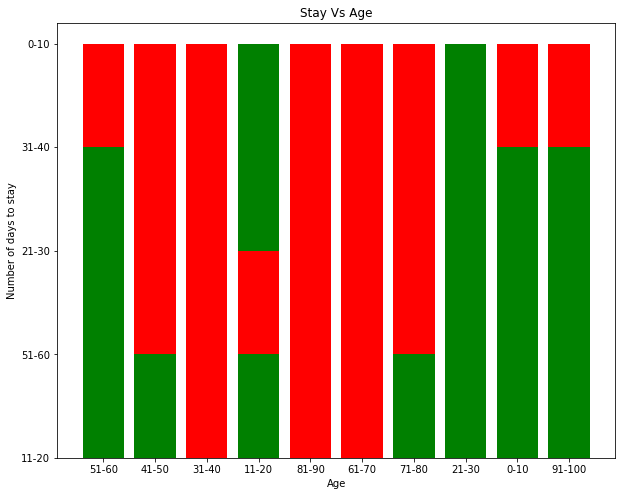

In [27]:
# Plotting an bar plot for Age Vs Stay
fig,ax=plt.subplots(figsize=(10,8))
ax.bar(data['Age'],data['Stay'],color=['r','g'])
ax.set(title='Stay Vs Age',
       xlabel="Age",
       ylabel='Number of days to stay');

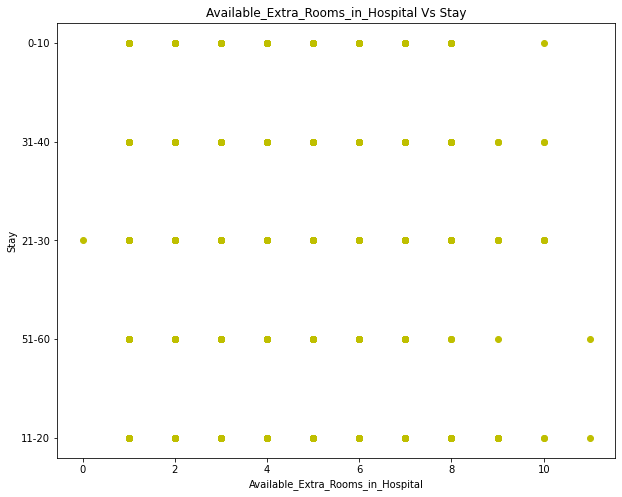

In [28]:
# Plotting a scatter plot for Available_Extra_Rooms Vs Stay
fig,ax=plt.subplots(figsize=(10,8))
ax.scatter(data['Available_Extra_Rooms_in_Hospital'],data['Stay'],color=['y'])
ax.set(title="Available_Extra_Rooms_in_Hospital Vs Stay",
       xlabel="Available_Extra_Rooms_in_Hospital",
       ylabel="Stay");

## Label Encoding all the categorical columns


In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

data['Hospital_type_code']=le.fit_transform(data['Hospital_type_code'])
data['Department']=le.fit_transform(data['Department'])
data['Ward_Type']=le.fit_transform(data['Ward_Type'])
data['Ward_Facility_Code']=le.fit_transform(data['Ward_Facility_Code'])
data['Type_of_Admission']=le.fit_transform(data['Type_of_Admission'])
data['Severity_of_Illness']=le.fit_transform(data['Severity_of_Illness'])
data['Age']=le.fit_transform(data['Age'])
data['Stay']=le.fit_transform(data['Stay'])

## Splitting the data into two parts 
> Here we would be splitting our data into training and testing set where we would be having an ratio of 80:20, which means we would be giving 80% of the data for training part and 20% of the data for testing part

In [30]:
from sklearn.model_selection import train_test_split
X=data.drop('Stay',axis=1)
y=data['Stay']

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Calculating the correlation 

In [32]:
corr_mat=data.corr()

In [33]:
corr_mat

,Hospital_type_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Age,Admission_Deposit,Stay
Hospital_type_code,1.000000,-0.112451,-0.005040,0.250037,-0.258111,0.018717,0.063611,0.088345,-0.007328,0.002355,0.029596,0.058762
Available_Extra_Rooms_in_Hospital,-0.112451,1.000000,0.062981,-0.431688,0.050565,-0.127597,-0.008989,-0.028725,0.014835,-0.146724,-0.150854,-0.080520
Department,-0.005040,0.062981,1.000000,-0.023531,-0.035845,-0.101044,0.020436,-0.077973,-0.007976,0.041730,-0.080486,0.001571
Ward_Type,0.250037,-0.431688,-0.023531,1.000000,-0.153413,-0.008858,0.014565,0.023013,0.007398,0.023281,0.060519,0.128055
Ward_Facility_Code,-0.258111,0.050565,-0.035845,-0.153413,1.000000,0.077509,-0.145414,0.039067,0.007090,-0.000951,-0.031654,0.011925
Bed_Grade,0.018717,-0.127597,-0.101044,-0.008858,0.077509,1.000000,-0.008145,0.126157,0.034171,0.005467,0.080571,-0.003229
City_Code_Patient,0.063611,-0.008989,0.020436,0.014565,-0.145414,-0.008145,1.000000,-0.026158,-0.010665,-0.019535,0.024296,-0.034589
Type_of_Admission,0.088345,-0.028725,-0.077973,0.023013,0.039067,0.126157,-0.026158,1.000000,0.009021,-0.066173,0.054938,0.071321
Severity_of_Illness,-0.007328,0.014835,-0.007976,0.007398,0.007090,0.034171,-0.010665,0.009021,1.000000,-0.023256,0.021451,-0.008918
Age,0.002355,-0.146724,0.041730,0.023281,-0.000951,0.005467,-0.019535,-0.066173,-0.023256,1.000000,0.022502,0.079264


# Visualizing the correlation 

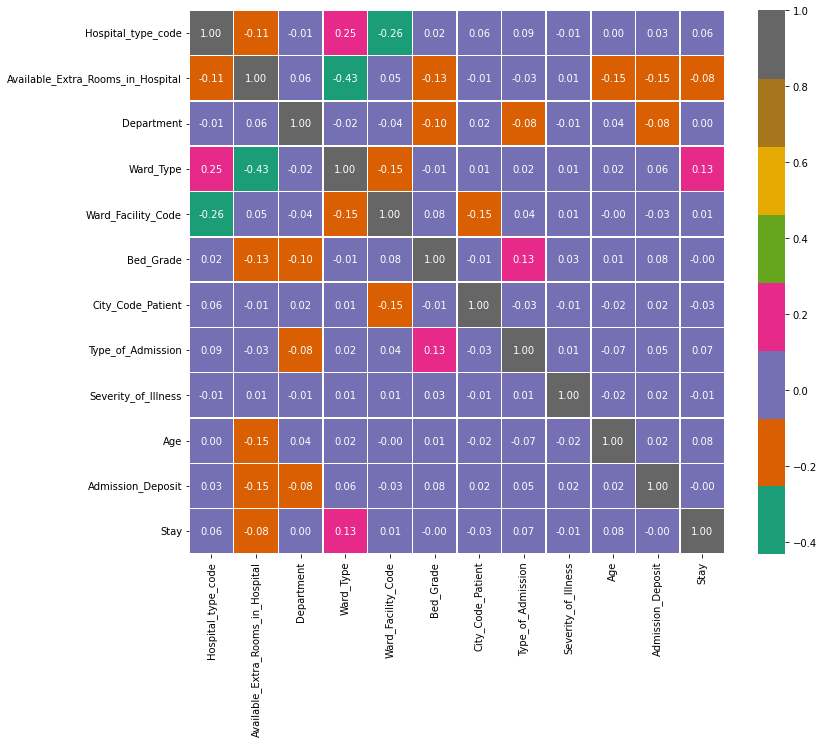

In [34]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(12,10))
ax=sns.heatmap(corr_mat,
              annot=True,
              linewidths=0.5,
              cmap='Dark2',
              fmt='.2f')

### Plotting a pairplot

In [ ]:
# sns.pairplot(corr_mat);

### Here Comes the Neural Nets 

### Creating the first neural network model
> Here we would add three layers of dense in which 2 would be the Dense(Input) layer and 1 would be the output layer.

We have compiled the model with:
* loss: "mae"
* optimizer: "adam"
* metrics="accuracy"

In [36]:
# Creating the model
import tensorflow as tf
model_1=tf.keras.Sequential([
              tf.keras.layers.Dense(100,activation="relu"),
              tf.keras.layers.Dense(10,activation="relu"),
              tf.keras.layers.Dense(1,activation="softmax",name="output_layer")
])
# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer="adam",
              metrics=["accuracy"])

In [37]:
history_model_1=model_1.fit(X_train,
          y_train,
          epochs=20)

Epoch 1/20
656/656 [==============================] - 5s 3ms/step - loss: 1.1702 - accuracy: 0.2763
Epoch 2/20
656/656 [==============================] - 2s 3ms/step - loss: 1.1702 - accuracy: 0.2763
Epoch 3/20
656/656 [==============================] - 2s 3ms/step - loss: 1.1702 - accuracy: 0.2763
Epoch 4/20
656/656 [==============================] - 2s 3ms/step - loss: 1.1702 - accuracy: 0.2763
Epoch 5/20
656/656 [==============================] - 2s 3ms/step - loss: 1.1702 - accuracy: 0.2763
Epoch 6/20
656/656 [==============================] - 2s 3ms/step - loss: 1.1702 - accuracy: 0.2763
Epoch 7/20
656/656 [==============================] - 2s 3ms/step - loss: 1.1702 - accuracy: 0.2763
Epoch 8/20
656/656 [==============================] - 2s 3ms/step - loss: 1.1702 - accuracy: 0.2763
Epoch 9/20
656/656 [==============================] - 2s 3ms/step - loss: 1.1702 - accuracy: 0.2763
Epoch 10/20
656/656 [==============================] - 2s 3ms/step - loss: 1.1702 - accuracy: 0.2763

In [38]:
model_1.evaluate(X_test,y_test)

164/164 [==============================] - 1s 2ms/step - loss: 1.1547 - accuracy: 0.2851


[1.1546529531478882, 0.2850877046585083]

In [39]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               1200      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
output_layer (Dense)         (None, 1)                 11        
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


## Creating our model_2
> This includes extra 2 Dense layers

In [40]:
model_2=tf.keras.Sequential([
              tf.keras.layers.Dense(1000,activation="relu"),
              tf.keras.layers.Dense(100,activation="relu"),
              tf.keras.layers.Dense(100,activation="relu"),
              tf.keras.layers.Dense(10,activation="relu"),
              tf.keras.layers.Dense(1,activation="softmax",name="output_layer")])

model_2.compile(loss="mae",
                optimizer="adam",
                metrics=["accuracy"])

In [41]:
history_model_2=model_2.fit(X_test,y_test,epochs=20)

Epoch 1/20
164/164 [==============================] - 1s 4ms/step - loss: 1.1547 - accuracy: 0.2851
Epoch 2/20
164/164 [==============================] - 1s 3ms/step - loss: 1.1547 - accuracy: 0.2851
Epoch 3/20
164/164 [==============================] - 1s 3ms/step - loss: 1.1547 - accuracy: 0.2851
Epoch 4/20
164/164 [==============================] - 1s 3ms/step - loss: 1.1547 - accuracy: 0.2851
Epoch 5/20
164/164 [==============================] - 1s 3ms/step - loss: 1.1547 - accuracy: 0.2851
Epoch 6/20
164/164 [==============================] - 1s 3ms/step - loss: 1.1547 - accuracy: 0.2851
Epoch 7/20
164/164 [==============================] - 1s 3ms/step - loss: 1.1547 - accuracy: 0.2851
Epoch 8/20
164/164 [==============================] - 1s 4ms/step - loss: 1.1547 - accuracy: 0.2851
Epoch 9/20
164/164 [==============================] - 1s 3ms/step - loss: 1.1547 - accuracy: 0.2851
Epoch 10/20
164/164 [==============================] - 1s 3ms/step - loss: 1.1547 - accuracy: 0.2851

In [42]:
model_2.evaluate(X_test,y_test)

164/164 [==============================] - 1s 2ms/step - loss: 1.1547 - accuracy: 0.2851


[1.1546529531478882, 0.2850877046585083]

## Creating an Early Stopping callback

> This would help us decrease our training time with best result

In [43]:
 callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5,mode="max")

## Creating model_3 
> This model includes hidden neurons with the multiples of 8.

In [58]:
 model_3 = tf.keras.models.Sequential([tf.keras.layers.Dense(256,activation="relu"),
                                       tf.keras.layers.Dense(128,activation="relu"),
                                       tf.keras.layers.Dense(64,activation="relu"),
                                       tf.keras.layers.Dense(1,activation="softmax")])
 
 model_3.compile(loss="mae",
                 optimizer="adam",
                 metrics=["accuracy"])
 
 history_model_3 = model_3.fit(X_train,
                       y_train,
                       validation_data=(X_test,y_test),
                       epochs=30,
                       callbacks=[callback])

Epoch 1/30
656/656 [==============================] - 3s 4ms/step - loss: 1.1702 - accuracy: 0.2763 - val_loss: 1.1547 - val_accuracy: 0.2851
Epoch 2/30
656/656 [==============================] - 2s 4ms/step - loss: 1.1702 - accuracy: 0.2763 - val_loss: 1.1547 - val_accuracy: 0.2851
Epoch 3/30
656/656 [==============================] - 2s 4ms/step - loss: 1.1702 - accuracy: 0.2763 - val_loss: 1.1547 - val_accuracy: 0.2851
Epoch 4/30
656/656 [==============================] - 2s 4ms/step - loss: 1.1702 - accuracy: 0.2763 - val_loss: 1.1547 - val_accuracy: 0.2851
Epoch 5/30
656/656 [==============================] - 2s 4ms/step - loss: 1.1702 - accuracy: 0.2763 - val_loss: 1.1547 - val_accuracy: 0.2851
Epoch 6/30
656/656 [==============================] - 2s 4ms/step - loss: 1.1702 - accuracy: 0.2763 - val_loss: 1.1547 - val_accuracy: 0.2851


In [60]:
model_3.evaluate(X_test,y_test)

164/164 [==============================] - 0s 2ms/step - loss: 1.1547 - accuracy: 0.2851


[1.1546529531478882, 0.2850877046585083]

## Plot thr loss curves

### Plotting the loss curves of model_1

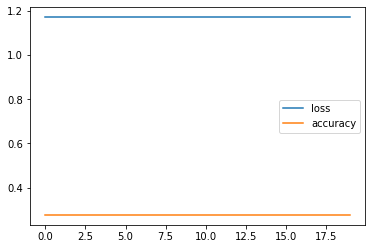

In [61]:
pd.DataFrame(history_model_1.history).plot();

### Plotting the loss curve of model_2

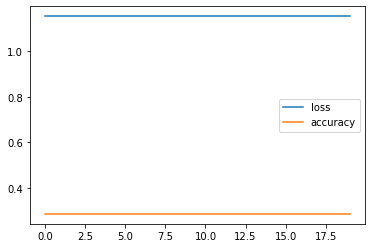

In [63]:
pd.DataFrame(history_model_2.history).plot()

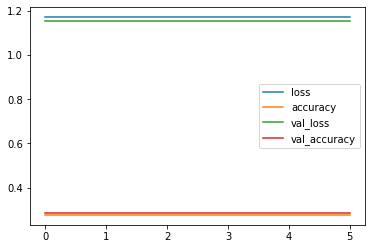

In [64]:
### Plotting loss curve of model_3
pd.DataFrame(history_model_3.history).plot()